### Visualizing S&P 500 Futures Logarithmic Returns Distribution

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "ES=F"
dataset = yf.download(ticker)
sp500 = pd.DataFrame(dataset)
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-18,1485.25,1489.75,1462.25,1467.50,1467.50,104794
2000-09-19,1467.00,1482.75,1466.75,1478.50,1478.50,103371
2000-09-20,1478.75,1480.50,1450.25,1469.50,1469.50,109667
2000-09-21,1470.25,1474.00,1455.50,1469.50,1469.50,98528
2000-09-22,1454.75,1471.00,1436.75,1468.50,1468.50,97416
...,...,...,...,...,...,...
2024-01-22,4872.50,4898.25,4872.50,4881.00,4881.00,1356050
2024-01-23,4881.75,4902.00,4874.25,4895.00,4895.00,1130749
2024-01-24,4900.25,4933.25,4889.00,4898.00,4898.00,1586824


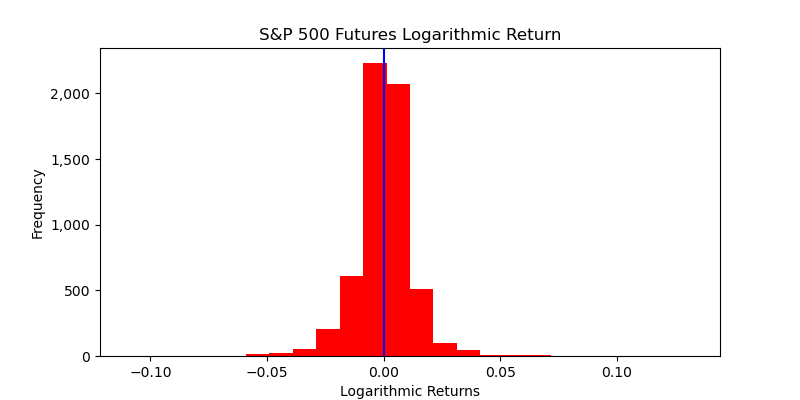

In [4]:
import matplotlib.ticker as ticker

# Enable interactive plotting in Jupyter notebook
%matplotlib widget

sp500["log_return"] = np.log(sp500['Adj Close']).diff()

max_daily_return = np.round(sp500["log_return"].max(),2)
min_daily_return = np.round(sp500["log_return"].min(),2)

n_bins = int((max_daily_return - min_daily_return)*100)


plt.figure(figsize=(8,4))
plt.hist(sp500["log_return"], bins=n_bins, color = "red", label = "Daily Return Distribution")
plt.axvline(sp500["log_return"].mean(), color = "blue", label = "Mean Return")
plt.title("S&P 500 Futures Logarithmic Return")
plt.ylabel("Frequency")
plt.xlabel('Logarithmic Returns')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # Format y-axis labels as integers
plt.legend
plt.show()